In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
#read data into DataFrame
df=pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.shape

(200, 4)

In [7]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [9]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

# Simple Linear Regression


In [12]:
df['total_spend']=df['TV']+df['radio']+df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [14]:
df.drop(columns=['TV','radio','newspaper'], inplace=True)
df

,sales,total_spend
0,22.1,337.1
1,10.4,128.9
2,9.3,132.4
3,18.5,251.3
4,12.9,250.0
...,...,...
195,7.6,55.7
196,9.7,107.2
197,12.8,192.7
198,25.5,391.8


# EDA

In [15]:
df.describe()

,sales,total_spend
count,200.000000,200.000000
mean,14.022500,200.860500
std,5.217457,92.985181
min,1.600000,11.700000
25%,10.375000,123.550000
50%,12.900000,207.350000
75%,17.400000,281.125000
max,27.000000,433.600000


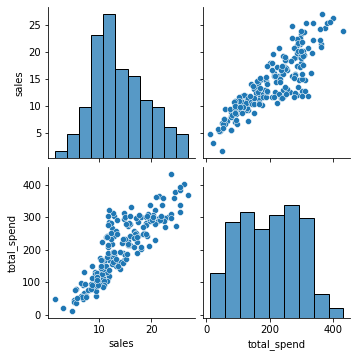

In [16]:
sns.pairplot(df)
plt.show()

In [17]:
df.corr()

,sales,total_spend
sales,1.000000,0.867712
total_spend,0.867712,1.000000


In [40]:
#taking X and Y
#taking one variable for now

X=df[['total_spend']]
y=df['sales']

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Least Square Line

# Modelling 

In [43]:
#create a model(Estimator)
# follow the usual sklearn patter import instatiate, fit

from sklearn.linear_model import LinearRegression
model=LinearRegression()    #intantiate
model.fit(X_train,y_train)   #fit

LinearRegression()

In [44]:
#print intercept and coefficients
model.intercept_, model.coef_

(4.199106500868725, array([0.04895385]))

In [45]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

# Plotting the Least Square Line

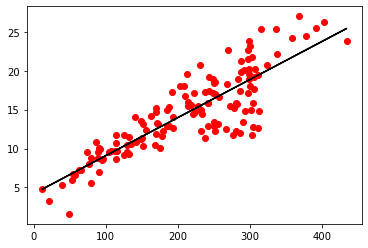

In [46]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,train_prediction,color='black')
plt.show()

# Evaluation Metrics

In [50]:
train_res=y_train - train_prediction
test_res=y_test - test_prediction

In [51]:
model.score(X_train,y_train)

0.7404192834391545

In [52]:
model.score(X_test,y_test)

0.7650262463310724

In [53]:
from sklearn.metrics import r2_score
r2_score(y_test,test_prediction)

0.7650262463310724

In [55]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X,y,cv=5)
scores
#Average of the MSE scores (we set back to positive)
abs(scores.mean())

0.743378317855542

In [57]:
#from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test,test_prediction)
MAE

1.9143627368130542

In [59]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,test_prediction)
MSE

6.415866312543216

In [60]:
RMSE=np.sqrt(MSE)
RMSE

2.5329560423629967

# Diagnosis Test

# 1.Linearity (Observed values vs Fitted values)

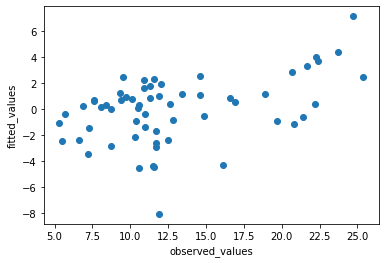

In [61]:
plt.scatter(y_test,test_res)
plt.xlabel("observed_values")
plt.ylabel("fitted_values")
plt.show()

# 2. Normality of Residuals

C:\Users\sairam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

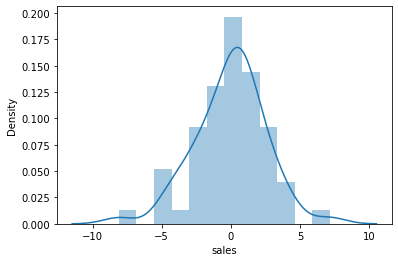

In [62]:
sns.distplot(test_res,kde=True)

#plt.hist(test_res)  ----> matplot code
#plt.show()

# 3. Homoscadesicity(y_hat vs residuals)

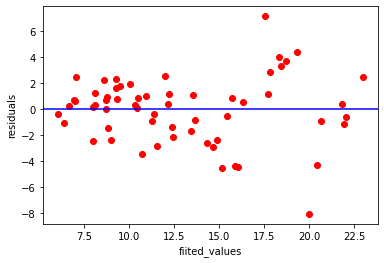

In [63]:
#Homoscadesicity(Residuals vs fitted values)
plt.scatter(test_prediction,test_res,c='r')
plt.axhline(y=0,color='blue')
plt.xlabel("fiited_values")
plt.ylabel("residuals")
plt.show()

In [64]:
spend=200
predicted_sales=4.199+0.04895*spend
predicted_sales

13.989

In [65]:
X_new=pd.DataFrame({'total_spend':[200]})
X_new

,total_spend
0,200


In [66]:
#use the model to make predictions on a new value
model.predict(X_new)

array([13.98987609])

# Confidence in the Model

In [67]:
import statsmodels.formula.api as smf
model1=smf.ols("y~X", data=df).fit()
#p-values for the variables and R-squared value for prepared model
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           5.06e-62
Time:                        23:12:21   Log-Likelihood:                -473.88
No. Observations:                 200   AIC:                             951.8
Df Residuals:                     198   BIC:                             958.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2430      0.439      9.676      0.000       3.378       5.108
X              0.0487      0.002     24.564      0.000       0.045       0.053
==============================================================================
Omnibus:                        6.851   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.692
Skew:                          -0.373   Prob(JB):                       0.0352
Kurtosis:                       3.495   Cond. No.                         528.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Retraining Model on full Data

In [68]:
final_model=LinearRegression()
final_model.fit(X,y)
final_model.coef_

array([0.04868788])

# Prediction on New Data

In [70]:
final_model.predict([[200]])

array([13.98060408])

# Deployment

# Model Persistance (Saving and Loading a Model)

In [71]:
from joblib import dump

In [72]:
dump(final_model,'sales_model.joblib')

['sales_model.joblib']

In [73]:
from joblib import load

In [74]:
loaded_model=load('sales_model.joblib')

In [76]:
loaded_model.intercept_

4.243028216036331

In [77]:
loaded_model.coef_

array([0.04868788])

In [78]:
loaded_model.predict([[200]])

array([13.98060408])